<center><h1>Chang_Yi_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [61]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Get the Vertebral Column Data Set

In [62]:
data = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])

df['class_01'] = df['class'].apply(lambda x: 1 if x == df.iloc[0, 6] else 0)

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

/Users/evangeline/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


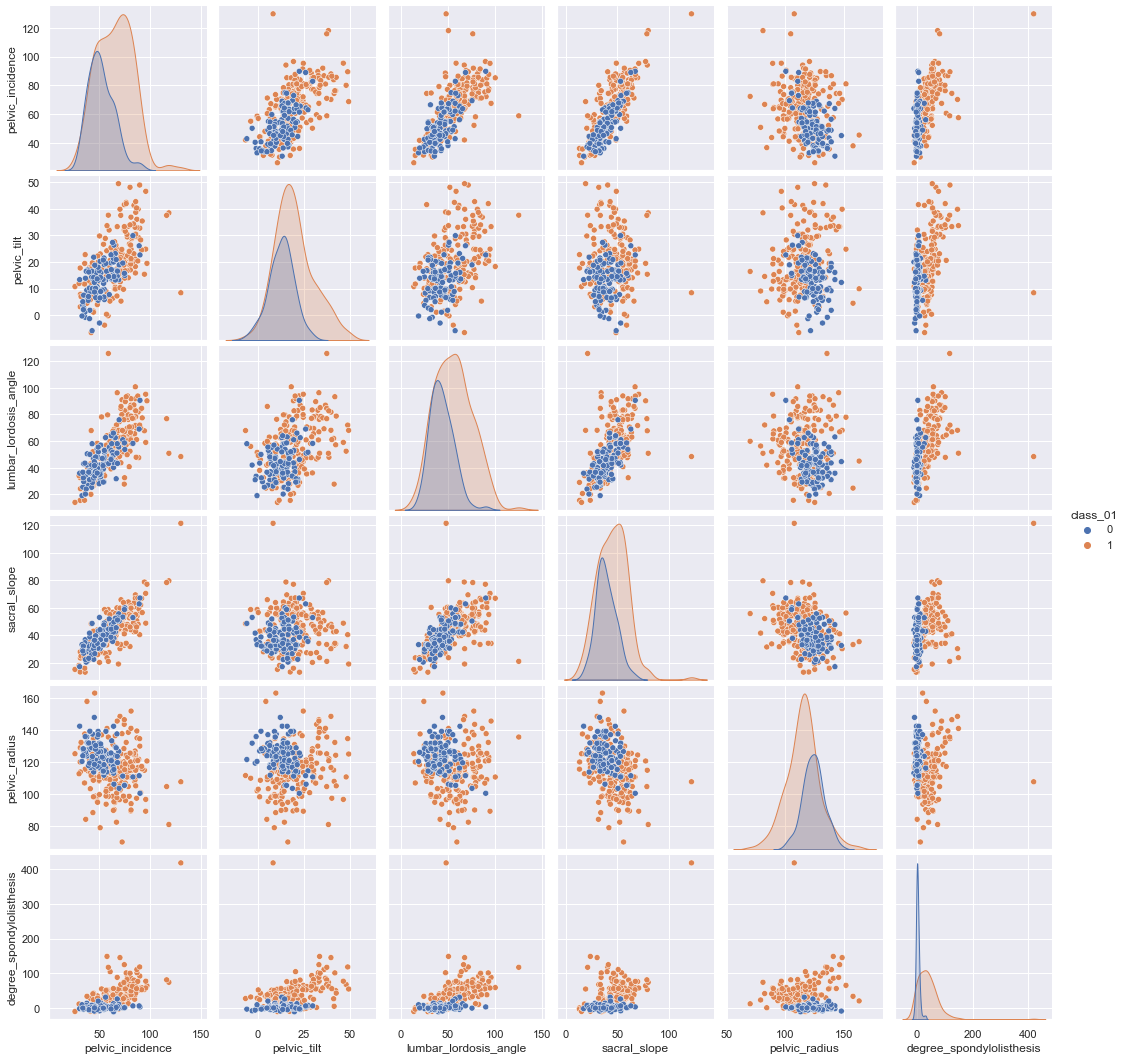

In [63]:
sns.set()
sns.pairplot(df, hue = 'class_01',vars=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'])
plt.show()

#### ii. Boxplots

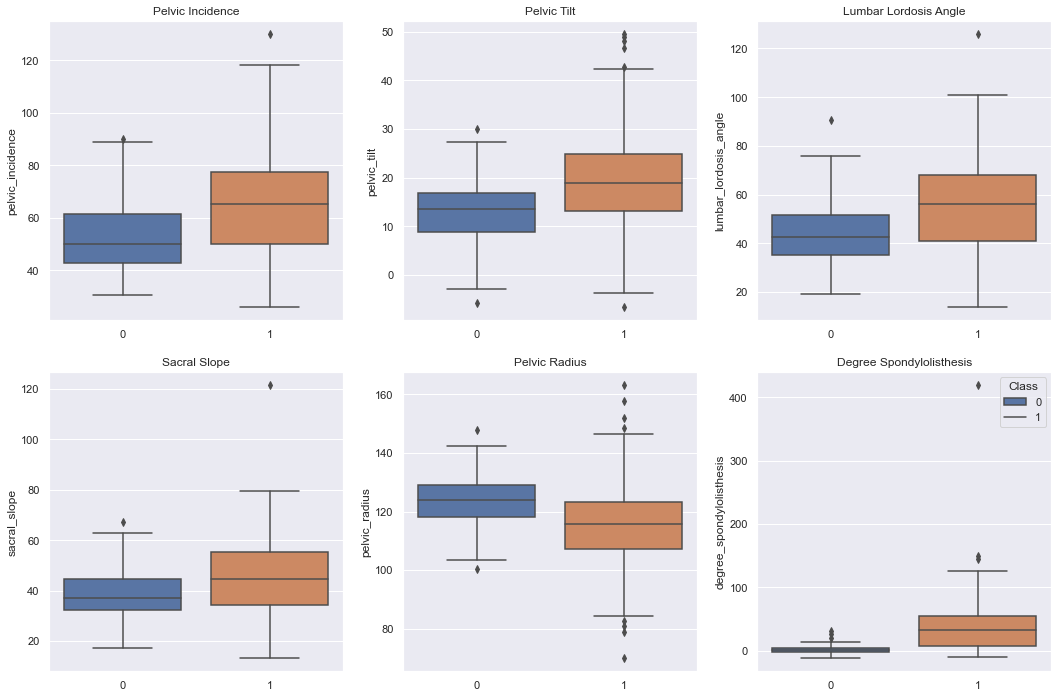

In [64]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Subplot 1: pelvic_incidence
sns.boxplot(data=df, x="class_01", y="pelvic_incidence", ax=axes[0, 0])
axes[0, 0].set_title("Pelvic Incidence")
axes[0, 0].set_xlabel('')

# Subplot 2: pelvic_tilt
sns.boxplot(data=df, x="class_01", y="pelvic_tilt", ax=axes[0, 1])
axes[0, 1].set_title("Pelvic Tilt")
axes[0, 1].set_xlabel('')

# Subplot 3: lumbar_lordosis_angle
sns.boxplot(data=df, x="class_01", y="lumbar_lordosis_angle", ax=axes[0, 2])
axes[0, 2].set_title("Lumbar Lordosis Angle")
axes[0, 2].set_xlabel('')

# Subplot 4: sacral_slope
sns.boxplot(data=df, x="class_01", y="sacral_slope", ax=axes[1, 0])
axes[1, 0].set_title("Sacral Slope")
axes[1, 0].set_xlabel('')

# Subplot 5: pelvic_radius
sns.boxplot(data=df, x="class_01", y="pelvic_radius", ax=axes[1, 1])
axes[1, 1].set_title("Pelvic Radius")
axes[1, 1].set_xlabel('')

# Subplot 6: degree_spondylolisthesis
sns.boxplot(data=df, x="class_01", y="degree_spondylolisthesis", ax=axes[1, 2])
axes[1, 2].set_title("Degree Spondylolisthesis")
axes[1, 2].set_xlabel('')

plt.legend(title="Class", labels=["0", "1"])

plt.tight_layout(pad=1.5)

plt.show()


#### iii. Split Data Set

In [65]:
train_data = pd.concat([df[df['class_01'] == 0].head(70), 
                        df[df['class_01'] == 1].head(140)])

test_data = pd.concat([df[df['class_01'] == 0].tail(len(df[df['class_01'] == 0]) - 70), 
                       df[df['class_01'] == 1].tail(len(df[df['class_01'] == 1]) - 140)])

### (c) Classification

#### i. Euclidean Metric

In [66]:
# independent variables
training_x = train_data.drop(columns=['class', 'class_01'])
test_x = test_data.drop(columns=['class', 'class_01'])

# class labels
training_y = train_data['class_01']
test_y = test_data['class_01']

In [67]:
# try with k = 4
k = 4
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(training_x, training_y)
y_pred = knn_classifier.predict(test_x)

#### ii. Test Data

In [68]:
k_values = list(range(208, 0, -3))   # k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order)
train_errors = []
test_errors = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, p=2)   # p=2: Euclidean distance (the default)
    knn_classifier.fit(training_x, training_y)
    
    y_train_pred = knn_classifier.predict(training_x)
    train_accuracy = accuracy_score(training_y, y_train_pred)
    train_error = 1 - train_accuracy
    train_errors.append(train_error)
    
    y_test_pred = knn_classifier.predict(test_x)
    test_accuracy = accuracy_score(test_y, y_test_pred)
    test_error = 1 - test_accuracy
    test_errors.append(test_error)

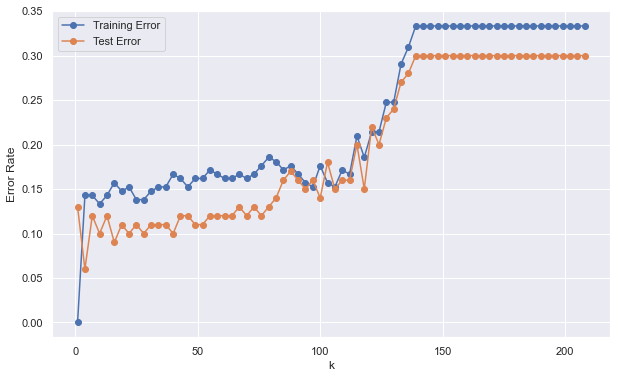

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Training Error', marker='o')
plt.plot(k_values, test_errors, label='Test Error', marker='o')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
# best k
best_k_index = np.argmin(test_errors)
best_k = k_values[best_k_index]
print(f'Best k: {best_k}', end='\n\n')

knn_classifier_optimal = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier_optimal.fit(training_x, training_y)

y_pred_optimal = knn_classifier_optimal.predict(test_x)

confusion = confusion_matrix(test_y, y_pred_optimal)

true_positive_rate = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])
true_negative_rate = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])

precision = confusion[1, 1] / (confusion[0, 1] + confusion[1, 1])
f1_score = 2 * (precision * true_positive_rate) / (precision + true_positive_rate)

print(f'Confusion Matrix:\n{confusion}', end='\n\n')
print(f'True Positive Rate: {true_positive_rate:.4f}')
print(f'True Negative Rate: {true_negative_rate:.4f}', end='\n\n')
print(f'Precision: {precision:.4f}', end='\n\n')
print(f'F1-Score: {f1_score:.4f}')

Best k: 4

Confusion Matrix:
[[25  5]
 [ 1 69]]

True Positive Rate: 0.9857
True Negative Rate: 0.8333

Precision: 0.9324

F1-Score: 0.9583


#### iii. Learning Curve

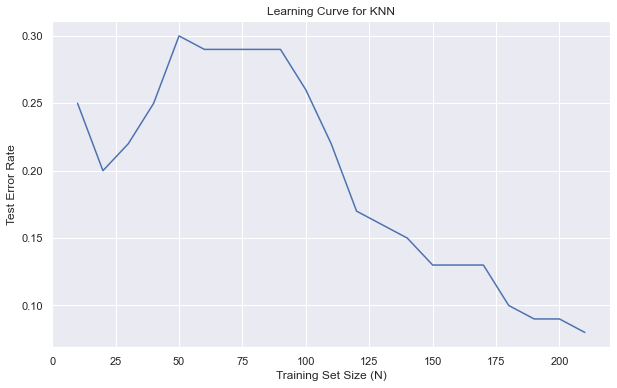

In [71]:
N_values = list(range(10, 211, 10))  # the size of training set N ∈ {10,20,30,...,210}
test_error_rates = []

for N in N_values:
    class_0_size = N // 3
    class_1_size = N - class_0_size
    training_set = pd.concat([
        df[df['class_01'] == 0].head(class_0_size),
        df[df['class_01'] == 1].head(class_1_size)
    ])
    training_x = training_set.drop(columns=['class', 'class_01'])
    training_y = training_set['class_01']

    best_k = 0
    best_score = 0
    
    for k in range(1, N, 5):
        knn = KNeighborsClassifier(n_neighbors=k, p=2)
        knn.fit(training_x, training_y)
        test_y_predict = knn.predict(test_x)
        score = accuracy_score(test_y, test_y_predict)
        
        if score > best_score:
            best_score = score
            best_k = k
    
    test_error_rates.append(1 - best_score)

# plot
plt.figure(figsize=(10, 6))
plt.plot(N_values, test_error_rates)
plt.xlabel('Training Set Size (N)')
plt.ylabel('Test Error Rate')
plt.title('Learning Curve for KNN')
plt.grid(True)
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html#scipy.spatial.distance.minkowski

##### A. Manhattan Distance with p = 1.

In [72]:
k_values = list(range(196, 1, -5))  # k ∈ {1,6,11,...,196}
best_k_manhattan = 0
best_error_manhattan = 1

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, p=1)   # p=1: Manhattan distance
    knn_classifier.fit(training_x, training_y)
    
    y_train_pred = knn_classifier.predict(training_x)
    train_accuracy = accuracy_score(training_y, y_train_pred)
    train_error = 1 - train_accuracy
    
    y_test_pred = knn_classifier.predict(test_x)
    test_accuracy = accuracy_score(test_y, y_test_pred)
    test_error = 1 - test_accuracy

    if test_error <= best_error_manhattan and k > 1:
        best_error_manhattan = test_error
        best_k_manhattan = k

print('Best k:', best_k_manhattan)
print(f'Test error for Best k: {best_error_manhattan:.2f}')

Best k: 6
Test error for Best k: 0.11


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [73]:
log10_p_values = np.arange(0.1, 1.1, 0.1)  # Values of log10(p) from 0.1 to 1.0
best_log10_p = 0
best_error_log10 = 1

for log10_p in log10_p_values:
    p = 10 ** log10_p  # Convert log10(p) back to p
    knn = KNeighborsClassifier(n_neighbors=best_k_manhattan, p=p, metric='minkowski')
    knn.fit(training_x, training_y)
    test_y_predict = knn.predict(test_x)
    test_error = 1 - accuracy_score(test_y, test_y_predict)

    if test_error < best_error_log10:
        best_error_log10 = test_error
        best_log10_p = log10_p

print(f"Best log10(p): {best_log10_p:.2f}")
print(f"Test Error for Best log10(p): {best_error_log10:.2f}")

Best log10(p): 0.60
Test Error for Best log10(p): 0.06


##### C. Chebyshev Distance With p -> infinity.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.chebyshev.html#scipy.spatial.distance.chebyshev

In [74]:
k_values = list(range(196, 0, -5))  # Values of k to consider
best_k_chebyshev = 0
best_error_chebyshev = 1

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', p=float('inf'))
    knn.fit(training_x, training_y)
    test_y_predict = knn.predict(test_x)
    test_error = 1 - accuracy_score(test_y, test_y_predict)
    
    if test_error <= best_error_chebyshev and k > 1:
        best_error_chebyshev = test_error
        best_k_chebyshev = k

print('Best k:', best_k_chebyshev)
print(f"Test Error for Best k: {best_error_chebyshev:.2f}")

Best k: 16
Test Error for Best k: 0.08


#### ii. Mahalanobis Distance
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html#scipy.spatial.distance.mahalanobis

In [75]:
k_values = list(range(196, 0, -5))  # Values of k to consider
best_k_mahalanobis = 0
best_error_mahalanobis = 1

S = training_x.cov()
SI = np.linalg.pinv(S)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': SI})   # metric_params: dict, additional keyword arguments for the metric function
    knn.fit(training_x, training_y)
    test_y_predict = knn.predict(test_x)
    test_error = 1 - accuracy_score(test_y, test_y_predict)
    
    if test_error <= best_error_mahalanobis and k > 1:
        best_error_mahalanobis = test_error
        best_k_mahalanobis = k

print('Best k:', best_k_mahalanobis)
print(f"Test Error for Best k: {best_error_mahalanobis:.2f}")

Best k: 6
Test Error for Best k: 0.16


##### summarize the test errors in a table

In [76]:
error_table = {'DistanceName':['Manhattan','Chebyshev','Mahalanobis'],
               'BestK':[best_k_manhattan,best_k_chebyshev,best_k_mahalanobis],
               'TestErrors':[best_error_manhattan, best_error_chebyshev, best_error_mahalanobis]}

resulttabled = pd.DataFrame(error_table)
resulttabled

,DistanceName,BestK,TestErrors
0,Manhattan,6,0.11
1,Chebyshev,16,0.08
2,Mahalanobis,6,0.16


### (e) Weighted Decision

In [77]:
k_values = list(range(196, 0, -5))

best_weighted_k_euclidean = 0
best_weighted_k_manhattan = 0
best_weighted_k_chebyshev = 0

best_weighted_error_euclidean = 1
best_weighted_error_manhattan = 1
best_weighted_error_chebyshev = 1

# euclidean
for k in k_values:
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    knn_euclidean.fit(training_x, training_y)

    test_y_predict_euclidean = knn_euclidean.predict(test_x)
    test_error_euclidean = 1 - accuracy_score(test_y, test_y_predict_euclidean)
    
    if test_error_euclidean <= best_weighted_error_euclidean and k > 1:
        best_weighted_error_euclidean = test_error_euclidean
        best_weighted_k_euclidean = k

# manhattan
for k in k_values:
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='distance')
    knn_manhattan.fit(training_x, training_y) 
    
    test_y_predict_manhattan = knn_manhattan.predict(test_x)
    test_error_manhattan = 1 - accuracy_score(test_y, test_y_predict_manhattan)

    if test_error_manhattan <= best_weighted_error_manhattan and k > 1:
        best_weighted_error_manhattan = test_error_manhattan
        best_weighted_k_manhattan = k

# chebyshev
for k in k_values:
    knn_chebyshev = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', weights='distance')
    
    knn_chebyshev.fit(training_x, training_y)
    
    test_y_predict_chebyshev = knn_chebyshev.predict(test_x)
    test_error_chebyshev = 1 - accuracy_score(test_y, test_y_predict_chebyshev)
    
    if test_error_chebyshev <= best_weighted_error_chebyshev and k > 1:
        best_weighted_error_chebyshev = test_error_chebyshev
        best_weighted_k_chebyshev = k

print('Best k (Euclidean):', best_weighted_k_euclidean)
print(f"Best Test Error (Euclidean): {best_weighted_error_euclidean:.2f}", end='\n\n')

print('Best k (Manhattan):', best_weighted_k_manhattan)
print(f"Best Test Error (Manhattan): {best_weighted_error_manhattan:.2f}", end='\n\n')

print('Best k (Chebyshev):', best_weighted_k_chebyshev)
print(f"Best Test Error (Chebyshev): {best_weighted_error_chebyshev:.2f}")

Best k (Euclidean): 6
Best Test Error (Euclidean): 0.10

Best k (Manhattan): 26
Best Test Error (Manhattan): 0.10

Best k (Chebyshev): 16
Best Test Error (Chebyshev): 0.11


### (f) Training Error Rate

The lowest training error happens when we set k (number of neighbors) to 1. <br>
When k = 1, the model would perfectly fit the training data, resulting in a zero training error rate.